In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 自由市场模型

经济学中最简单的模型就是自由市场中的供给-需求模型。它满足以下的供给曲线和需求曲线：

线性需求曲线 $ Q = a_d - b_d p $

线性供给曲线 $ Q = a_z + b_z (p - \text{tax}) $

其中$Q$是数量，$p$是价格，其他的都是参数，这里包含了向企业收税的情况。

你的老板JL给你提出了以下要求：

1. 要求你建立一个名为`Market`的python类 (class)。这个class就代表着一个市场。市场拥有的属性是 $a_d, b_d, a_z, b_z, \text{tax}$。当给这些参数赋值之后，你就设计出了一个市场。

2. 请建立一个市场，它的参数分别为$a_d = 15, b_d=0.5, a_z=-2, b_z=0.5, \text{tax}=3$. 这个市场命名为`free_m`。


3. 要求能通过`free_m.price()`计算出该市场的均衡价格。


4. 要求能通过`free_m.quantity()`计算出该市场的均衡数量。


5. 要求能通过`free_m.tax_revenue()`计算出在均衡情况下的总税收。


6. 要求能通过`free_m.consumer_surplus()`计算出在均衡情况下的消费者剩余。同样，通过`free_m.producer_surplus()`计算出在均衡情况下的生产者剩余。


7. 要求能通过`free_m.demand(p)`计算出价格为`p`时的需求为多少。


8. 要求能通过`free_m.supply(p)`计算出价格为`p`时的供给为多少。


9. 要求能通过`free_m.supply_no_tax(p)`计算出不收税情况下、价格为`p`时的供给为多少。


10. 根据上面设计好的函数，画出收税与不收税时的需求-供给曲线。（坐标轴、legend什么的都要有）


注：计算surplus需要积分，可以查`scipy`如何进行积分操作。Good luck!

https://python.quantecon.org/python_oop.html#Example:-A-Market

In [2]:
from scipy.integrate import quad

class Market:

    def __init__(self, ad, bd, az, bz, tax):
        """
        Set up market parameters.  All parameters are scalars.  See
        https://lectures.quantecon.org/py/python_oop.html for interpretation.

        """
        self.ad, self.bd, self.az, self.bz, self.tax = ad, bd, az, bz, tax
        if ad < az:
            raise ValueError('Insufficient demand.')

    def price(self):
        "Return equilibrium price"
        return  (self.ad - self.az + self.bz * self.tax) / (self.bd + self.bz)

    def quantity(self):
        "Compute equilibrium quantity"
        return  self.ad - self.bd * self.price()

    def consumer_surplus(self):
        "Compute consumer surplus"
        # == Compute area under inverse demand function == #
        integrand = lambda x: (self.ad / self.bd) - (1 / self.bd) * x
        area, error = quad(integrand, 0, self.quantity())
        return area - self.price() * self.quantity()

    def producer_surplus(self):
        "Compute producer surplus"
        #  == Compute area above inverse supply curve, excluding tax == #
        integrand = lambda x: -(self.az / self.bz) + (1 / self.bz) * x
        area, error = quad(integrand, 0, self.quantity())
        return (self.price() - self.tax) * self.quantity() - area

    def tax_revenue(self):
        "Compute tax revenue"
        return self.tax * self.quantity()

    def demand(self, x):
        "Compute inverse demand"
        return self.ad / self.bd - (1 / self.bd) * x

    def supply(self, x):
        "Compute inverse supply curve"
        return -(self.az / self.bz) + (1 / self.bz) * x + self.tax

    def supply_no_tax(self, x):
        "Compute inverse supply curve without tax"
        return -(self.az / self.bz) + (1 / self.bz) * x

In [6]:
baseline_params = 15, .5, -2, .5, 3
free_m = Market(*baseline_params)

print("equilibrium price = ", free_m.price())
print("consumer surplus = ", free_m.consumer_surplus())

equilibrium price =  18.5
consumer surplus =  33.0625


In [17]:
plt.rc('font', size=15)

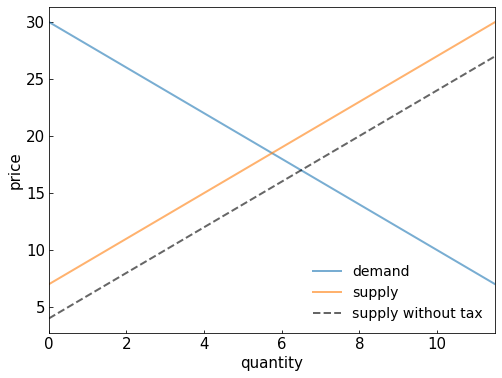

In [18]:
q_max = free_m.quantity() * 2
q_grid = np.linspace(0.0, q_max, 100)
pd = free_m.demand(q_grid)
ps = free_m.supply(q_grid)
psno = free_m.supply_no_tax(q_grid)

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(q_grid, pd, lw=2, alpha=0.6, label='demand')
ax.plot(q_grid, ps, lw=2, alpha=0.6, label='supply')
ax.plot(q_grid, psno, '--k', lw=2, alpha=0.6, label='supply without tax')
ax.set_xlabel('quantity')
ax.set_xlim(0, q_max)
ax.set_ylabel('price')
ax.legend(loc='lower right', frameon=False, fontsize=14)

ax.tick_params(direction='in')
plt.show()